In [1]:
import scanpy as sc
import pycaret
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.classification import *

ImportError: cannot import name '_format_load_msg' from 'joblib.memory' (/home/data/sdzl14/anaconda3/envs/pycaret/lib/python3.8/site-packages/joblib/memory.py)

In [2]:
ad = sc.read_h5ad('/home/data/sdzl14/NSCLC/pdf/20250107 sdb/tumor.h5ad')
ad = ad.copy()


In [5]:
ad.obs['leiden']

001C_AAAGTAGCAATGACCT-0    11
001C_AACCGCGGTTATGTGC-0    11
001C_ACCGTAATCACTTCAT-0    11
001C_ATAGACCAGTCCTCCT-0    11
001C_ATTGGTGCAATGTAAG-0    11
                           ..
bcFXDL_25-21                7
bcHFJH_25-21                7
bcAHGH_25-21                7
bcEFVT_25-21                7
bcHDOT_25-21                7
Name: leiden, Length: 90243, dtype: category
Categories (14, object): ['0', '1', '2', '3', ..., '10', '11', '12', '13']

In [8]:
sc.tl.leiden(ad, resolution=0.4, random_state=0,key_added='leiden_0.4')
sc.pp.subsample(ad, n_obs=10000,random_state=5)

In [9]:
sc.pp.highly_variable_genes(ad,n_top_genes=7000,flavor='cell_ranger')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

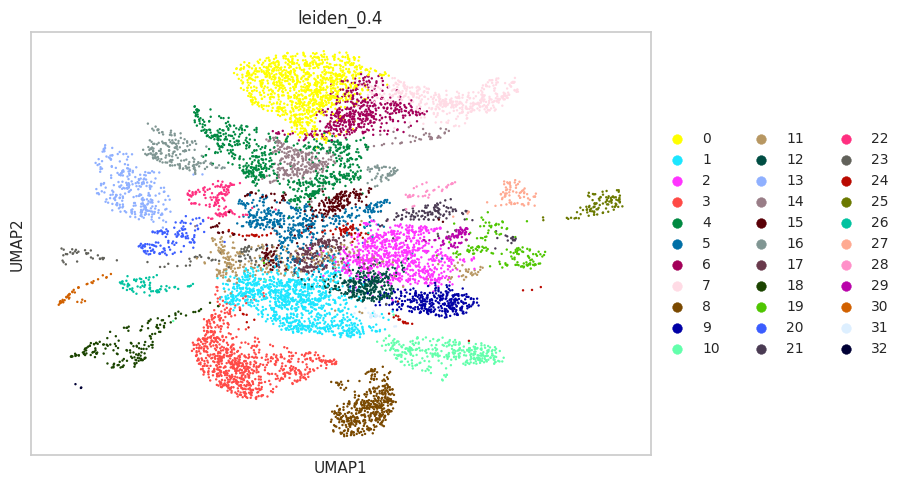

In [11]:
sc.pl.umap(ad, color=['leiden_0.4'])

In [12]:
# 根据 leiden 结果新增 obs['stem_cell']
ad.obs['stem_cell'] = ad.obs['leiden_0.4'].apply(lambda x: '1' if x == '6' else '0')

In [22]:
ad = ad[:, ad.var['highly_variable']]

In [13]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split

In [23]:
def label(x):
    if x == 'stem_cell':
        return 1
    else:
        return 0
ad.obs
y =ad.obs.stem_cell.map(label)

In [25]:


# 定义抽样比例，这里是90%训练集，10%测试集
train_ratio = 0.9

# 获取细胞数和特征数
n_cells = ad.shape[0]
n_features = ad.shape[1]

# 创建索引列表
indices = list(range(n_cells))

# 根据抽样比例分割索引列表
train_indices, test_indices = train_test_split(indices, train_size=train_ratio, random_state=42)

# 根据索引列表获取训练集和测试集的AnnData对象
anndata_train = ad[train_indices, :]
anndata_test = ad[test_indices, :]

In [26]:
# 提取基因表达矩阵并转换为非稀疏矩阵
expression_matrix = anndata_train.X.toarray()

# 创建新的DataFrame，并设置行名和列名
df = pd.DataFrame(data=expression_matrix, index=anndata_train.obs_names, columns=anndata_train.var_names)

# 添加一列，列名为"root"，内容为细胞对应的分类
df['stem_cell'] = anndata_train.obs['stem_cell']

# 打印结果
print(df)

                               A1BG-AS1   A2M-AS1     A4GNT      AACS  \
CTGTCGTTCTGGAGAG-1_8-1        -0.064181 -0.039103 -0.009128 -0.249695   
134530834578779_5-10          -0.064181 -0.039103 -0.009128 -0.249695   
CTAGCCTTCGTTGACA-1_3-6        -0.064181 -0.039103 -0.009128 -0.249695   
ATCGAGTTCTAAGCCA-1_8-6        -0.064181 -0.039103 -0.009128  1.309857   
CTACGTCGTAGATTAG-1_5-8        -0.064181 -0.039103 -0.009128 -0.249695   
...                                 ...       ...       ...       ...   
24_ATGCGCCCGCCG-20            -0.064181 -0.039103 -0.009128 -0.249695   
22_TCCTATCCGACG-20            -0.064181 -0.039103 -0.009128 -0.249695   
HD65_TAGGCATGTTCATGGT-4       -0.064181 -0.039103 -0.009128  1.414769   
AACTGGTTCAGTTGAC_BRONCHO_11-5 -0.064181 -0.039103 -0.009128 -0.249695   
TCTCATACAACAACCT_LUNG_T25-5   -0.064181 -0.039103 -0.009128 -0.249695   

                                AADACL2      AAMP     AANAT     AASDH  \
CTGTCGTTCTGGAGAG-1_8-1        -0.036746  1.503030 

In [27]:
# 提取基因表达矩阵并转换为非稀疏矩阵
expression_matrix_test = anndata_test.X.toarray()

# 创建新的DataFrame，并设置行名和列名
df_test = pd.DataFrame(data=expression_matrix_test, index=anndata_test.obs_names, columns=anndata_test.var_names)

# 添加一列，列名为"root"，内容为细胞对应的分类
df_test['stem_cell'] = anndata_test.obs['stem_cell']

# 打印结果
print(df_test)

                          A1BG-AS1   A2M-AS1     A4GNT      AACS   AADACL2  \
AGATTGCCAGGGTTAG_NS_07-5 -0.064181 -0.039103 -0.009128 -0.249695 -0.036746   
GTACTTTGTATATGAG-1_8-8   -0.064181 -0.039103 -0.009128 -0.249695 -0.036746   
CTGTGCTGTAGGCATG-1_3-6   -0.064181 -0.039103 -0.009128 -0.249695 -0.036746   
26_CGCAAAGGTGTA-20       -0.064181 -0.039103 -0.009128 -0.249695 -0.036746   
1_TGGAAGACTCTA-20        -0.064181 -0.039103 -0.009128 -0.249695 -0.036746   
...                            ...       ...       ...       ...       ...   
25_AACGAGACTTGC-20       -0.064181 -0.039103 -0.009128 -0.249695 -0.036746   
SRR10788793-13           -0.064181 -0.039103 -0.009128 -0.249695 -0.036746   
59_CACGCAGCAGAC-20       -0.064181 -0.039103 -0.009128 -0.249695 -0.036746   
4_TGAATCACTGAT-20        -0.064181 -0.039103 -0.009128 -0.249695 -0.036746   
55_ACAGAAGTTAAA-20       -0.064181 -0.039103 -0.009128 -0.249695 -0.036746   

                              AAMP     AANAT     AASDH  AASDHPP

In [28]:
models = setup(data = df, target='stem_cell', session_id=123,n_jobs=30,use_gpu=True) 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA A100 80GB PCIe, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

,Description,Value
0,Session id,123
1,Target,stem_cell
2,Target type,Binary
3,Target mapping,"0: 0, 1: 1"
4,Original data shape,"(9000, 8001)"
5,Transformed data shape,"(9000, 8001)"
6,Transformed train set shape,"(6300, 8001)"
7,Transformed test set shape,"(2700, 8001)"
8,Numeric features,8000
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA A100 80GB PCIe, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet 

In [29]:
best_model = compare_models(n_select=4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9821,0.9896,0.9821,0.9813,0.9810,0.7806,0.7881,5.2460
lightgbm,Light Gradient Boosting Machine,0.9819,0.9908,0.9819,0.9811,0.9808,0.7789,0.7861,7.8760
lr,Logistic Regression,0.9810,0.9863,0.9810,0.9798,0.9799,0.7691,0.7744,2.3600
catboost,CatBoost Classifier,0.9803,0.9889,0.9803,0.9793,0.9791,0.7585,0.7661,38.1780
gbc,Gradient Boosting Classifier,0.9725,0.9821,0.9725,0.9703,0.9699,0.6438,0.6596,129.8300
ada,Ada Boost Classifier,0.9721,0.9799,0.9721,0.9707,0.9712,0.6758,0.6780,26.9570
svm,SVM - Linear Kernel,0.9663,0.0000,0.9663,0.9623,0.9609,0.5196,0.5529,2.9260
dt,Decision Tree Classifier,0.9524,0.7436,0.9524,0.9535,0.9526,0.4864,0.4896,12.8120
rf,Random Forest Classifier,0.9522,0.9807,0.9522,0.9143,0.9296,0.0233,0.0453,1.7590
et,Extra Trees Classifier,0.9521,0.9782,0.9521,0.9182,0.9293,0.0180,0.0477,1.7250


In [30]:
print(best_model)

[XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=30,
              num_parallel_tree=None, objective='binary:logistic', ...), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
 

In [31]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9730,0.9796,0.9730,0.9706,0.9707,0.6531,0.6644
1,0.9873,0.9911,0.9873,0.9869,0.9869,0.8505,0.8529
2,0.9714,0.9802,0.9714,0.9688,0.9693,0.6393,0.6477
3,0.9905,0.9929,0.9905,0.9903,0.9902,0.8879,0.8904
4,0.9762,0.9778,0.9762,0.9745,0.9747,0.7048,0.7116
5,0.9794,0.9946,0.9794,0.9782,0.9785,0.7529,0.7564
6,0.9873,0.9975,0.9873,0.9869,0.9869,0.8554,0.8577
7,0.9794,0.9751,0.9794,0.9783,0.9777,0.7443,0.7562
8,0.9873,0.9957,0.9873,0.9869,0.9869,0.8554,0.8577


In [32]:
tuned_lr = tune_model(lr, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9730,0.9812,0.9730,0.9707,0.9701,0.6398,0.6579
1,0.9857,0.9921,0.9857,0.9852,0.9851,0.8290,0.8327
2,0.9714,0.9812,0.9714,0.9688,0.9693,0.6393,0.6477
3,0.9889,0.9929,0.9889,0.9887,0.9884,0.8670,0.8709
4,0.9746,0.9781,0.9746,0.9725,0.9727,0.6794,0.6883
5,0.9762,0.9946,0.9762,0.9747,0.9752,0.7149,0.7182
6,0.9841,0.9970,0.9841,0.9835,0.9833,0.8132,0.8184
7,0.9794,0.9771,0.9794,0.9783,0.9777,0.7443,0.7562
8,0.9841,0.9957,0.9841,0.9835,0.9833,0.8132,0.8184


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [33]:
print(tuned_lr)

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


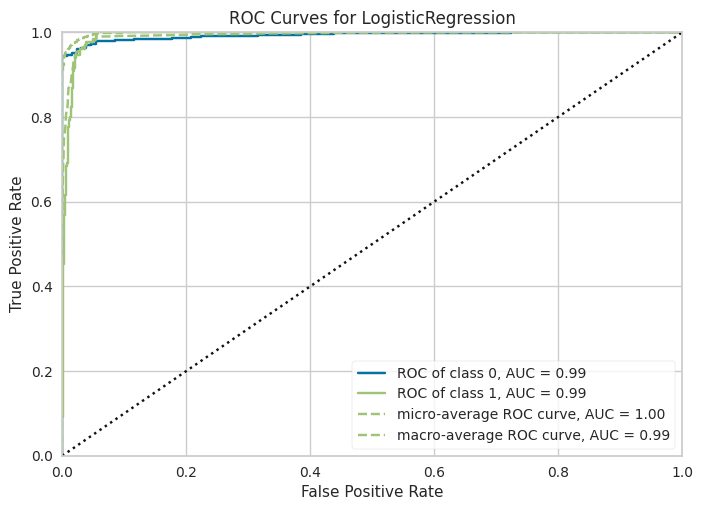

In [34]:
plot_model(tuned_lr, plot = 'auc')

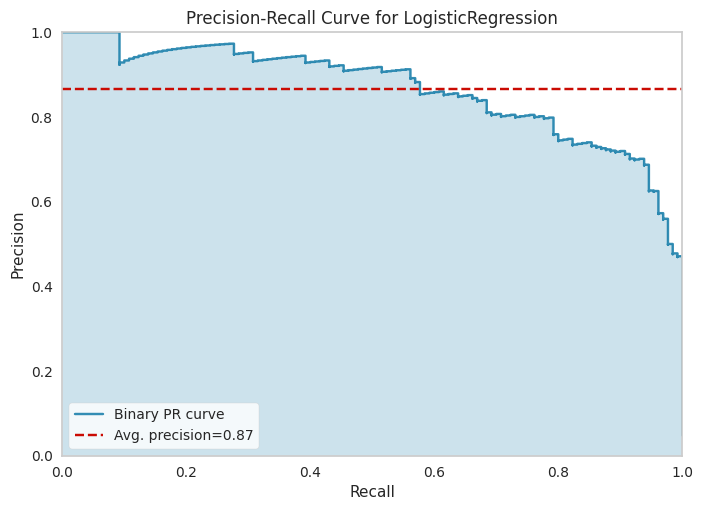

In [35]:
plot_model(tuned_lr, plot = 'pr')

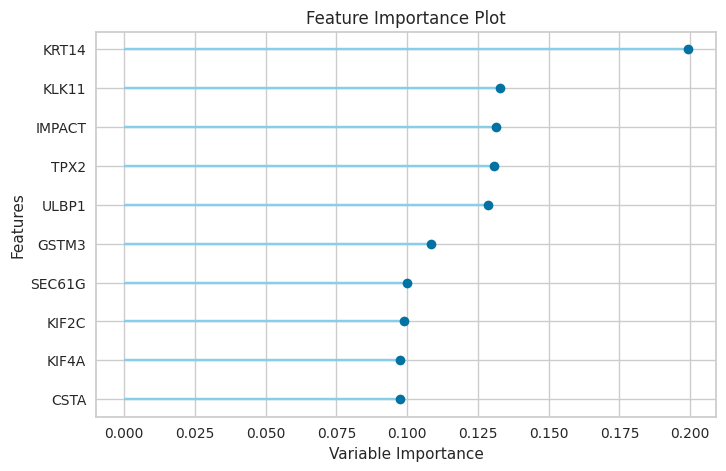

In [36]:
plot_model(tuned_lr, plot='feature')

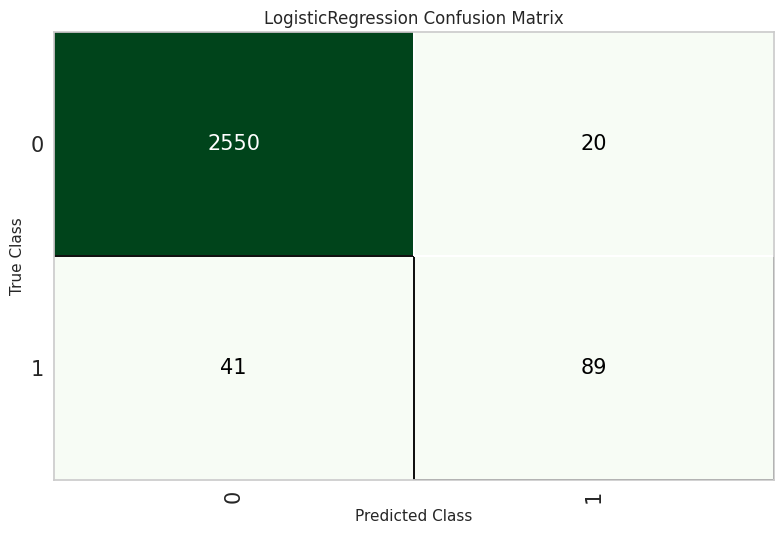

In [37]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [38]:
predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9774,0.9929,0.9774,0.9761,0.9765,0.7330,0.7362


ValueError: y contains previously unseen labels: 0

In [39]:
final_lr = finalize_model(tuned_lr)

In [40]:
print(final_lr)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['A1BG-AS1', 'A2M-AS1', 'A4GNT',
                                             'AACS', 'AADACL2', 'AAMP', 'AANAT',
                                             'AASDH', 'AASDHPPT', 'AATF',
                                             'ABALON', 'ABCA10', 'ABCA12',
                                             'ABCA2', 'ABCA5', 'ABCA6', 'A...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 LogisticRegression(C=0.056, class_weight={}, dual=False,
                        

In [41]:
unseen_predictions = predict_model(final_lr, data=df_test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9770,0.9710,0.9770,0.9761,0.9764,0.7508,0.7519


ValueError: y contains previously unseen labels: 0

In [ ]:
save_model(final_lr,'/home/data/sdzl14/NSCLC/pdf/20250115 pycaret/Final lr Model 250115.pkl')

In [42]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9825,0.9935,0.9825,0.9821,0.9811,0.7755,0.7889
1,0.9825,0.9930,0.9825,0.9821,0.9811,0.7755,0.7889
2,0.9730,0.9806,0.9730,0.9713,0.9718,0.6769,0.6800
3,0.9841,0.9988,0.9841,0.9837,0.9830,0.7996,0.8101
4,0.9714,0.9837,0.9714,0.9686,0.9687,0.6257,0.6397
5,0.9857,0.9891,0.9857,0.9852,0.9854,0.8346,0.8359
6,0.9873,0.9968,0.9873,0.9870,0.9867,0.8506,0.8560
7,0.9873,0.9942,0.9873,0.9875,0.9864,0.8454,0.8557
8,0.9857,0.9927,0.9857,0.9854,0.9848,0.8290,0.8365


In [43]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9825,0.9935,0.9825,0.9821,0.9811,0.7755,0.7889
1,0.9825,0.9930,0.9825,0.9821,0.9811,0.7755,0.7889
2,0.9746,0.9804,0.9746,0.9732,0.9737,0.7011,0.7030
3,0.9841,0.9988,0.9841,0.9837,0.9830,0.7996,0.8101
4,0.9714,0.9837,0.9714,0.9686,0.9687,0.6257,0.6397
5,0.9857,0.9891,0.9857,0.9852,0.9854,0.8346,0.8359
6,0.9873,0.9968,0.9873,0.9870,0.9867,0.8506,0.8560
7,0.9873,0.9941,0.9873,0.9875,0.9864,0.8454,0.8557
8,0.9857,0.9927,0.9857,0.9854,0.9848,0.8290,0.8365


In [44]:
tuned_lightgbm = tune_model(lightgbm, optimize = 'AUC')
print(tuned_lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9794,0.9923,0.9794,0.9782,0.9785,0.7529,0.7564
1,0.9825,0.9928,0.9825,0.9821,0.9811,0.7755,0.7889
2,0.9730,0.9834,0.9730,0.9708,0.9713,0.6654,0.6718
3,0.9873,0.9973,0.9873,0.9870,0.9866,0.8453,0.8511
4,0.9762,0.9802,0.9762,0.9744,0.9742,0.6939,0.7059
5,0.9825,0.9947,0.9825,0.9819,0.9821,0.7979,0.7991
6,0.9841,0.9964,0.9841,0.9835,0.9833,0.8132,0.8184
7,0.9841,0.9921,0.9841,0.9838,0.9830,0.8067,0.8165
8,0.9857,0.9927,0.9857,0.9852,0.9851,0.8347,0.8382


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Number of positive: 274, number of negative: 5396
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 655059
[LightGBM] [Info] Number of data points in the train set: 5670, number of used features: 40

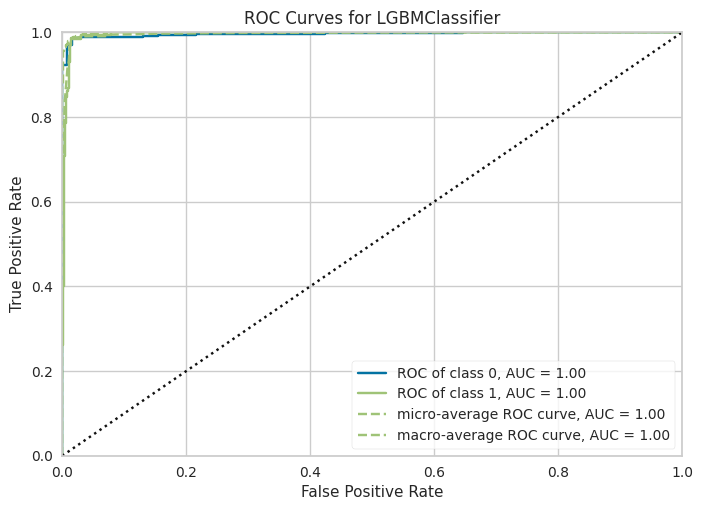

In [45]:
plot_model(tuned_lightgbm, plot = 'auc')

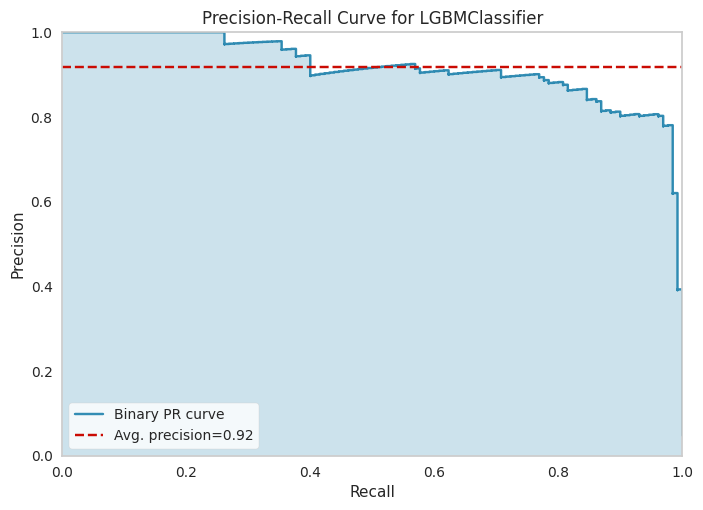

In [46]:
plot_model(tuned_lightgbm, plot = 'pr')

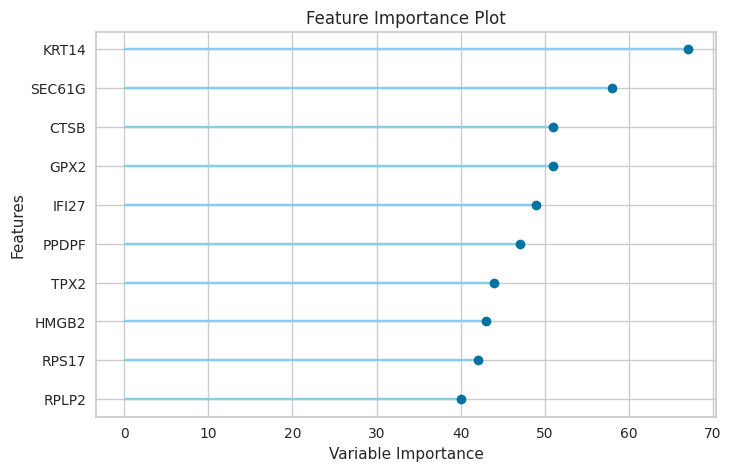

In [47]:
plot_model(tuned_lightgbm, plot='feature')

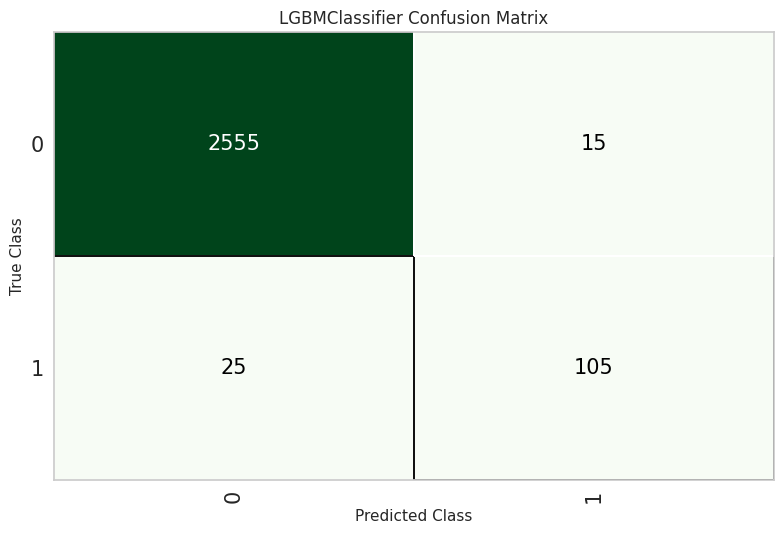

In [48]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [ ]:
predict_model(tuned_lightgbm)

In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

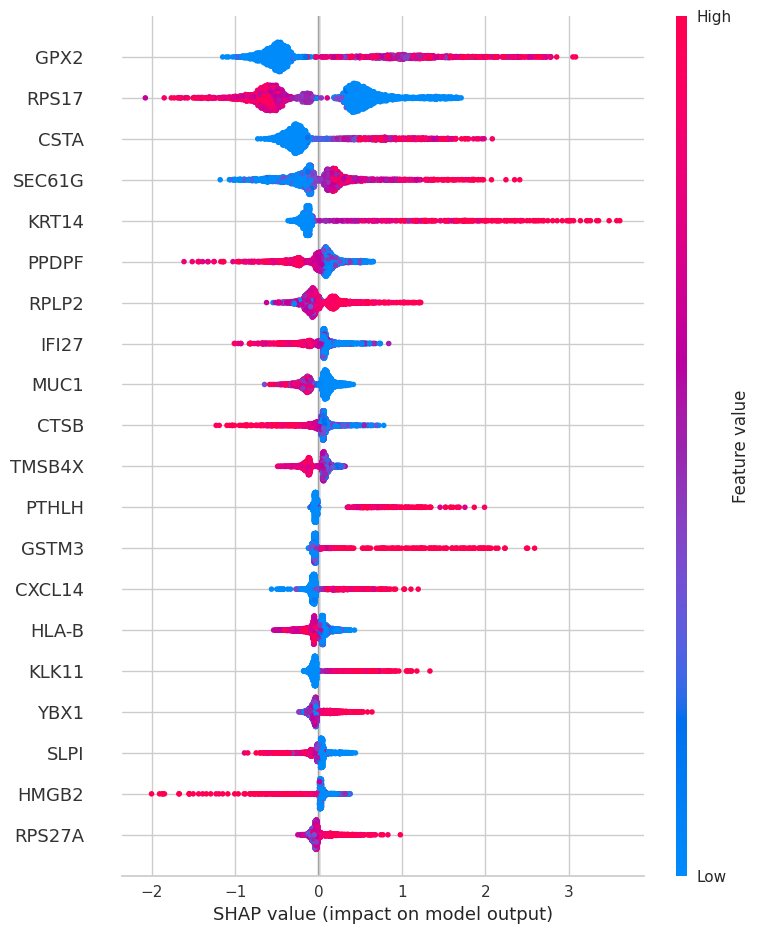

In [49]:
interpret_model(tuned_lightgbm)

In [ ]:
save_model(final_lightgbm, '/home/data/sdzl14/NSCLC/pdf/20250115 pycaret/Final lightgbm Model 250115.pkl')

In [50]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9841,0.9869,0.9841,0.9835,0.9833,0.8066,0.8121
1,0.9810,0.9890,0.9810,0.9804,0.9791,0.7505,0.7673
2,0.9667,0.9823,0.9667,0.9629,0.9638,0.5714,0.5813
3,0.9841,0.9961,0.9841,0.9835,0.9833,0.8066,0.8121
4,0.9730,0.9802,0.9730,0.9708,0.9713,0.6654,0.6718
5,0.9778,0.9883,0.9778,0.9767,0.9770,0.7384,0.7405
6,0.9857,0.9975,0.9857,0.9859,0.9846,0.8230,0.8362
7,0.9825,0.9916,0.9825,0.9821,0.9811,0.7836,0.7962
8,0.9857,0.9908,0.9857,0.9852,0.9851,0.8347,0.8382


In [51]:
tuned_catboost= tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9746,0.9778,0.9746,0.9728,0.9733,0.6906,0.6953
1,0.9730,0.9846,0.9730,0.9711,0.9694,0.6254,0.6527
2,0.9635,0.9753,0.9635,0.9591,0.9604,0.5306,0.5398
3,0.9730,0.9912,0.9730,0.9707,0.9701,0.6398,0.6579
4,0.9667,0.9734,0.9667,0.9629,0.9638,0.5714,0.5813
5,0.9794,0.9857,0.9794,0.9785,0.9788,0.7612,0.7623
6,0.9762,0.9919,0.9762,0.9745,0.9747,0.7150,0.7214
7,0.9762,0.9875,0.9762,0.9748,0.9737,0.6941,0.7122
8,0.9762,0.9857,0.9762,0.9745,0.9743,0.7049,0.7162


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


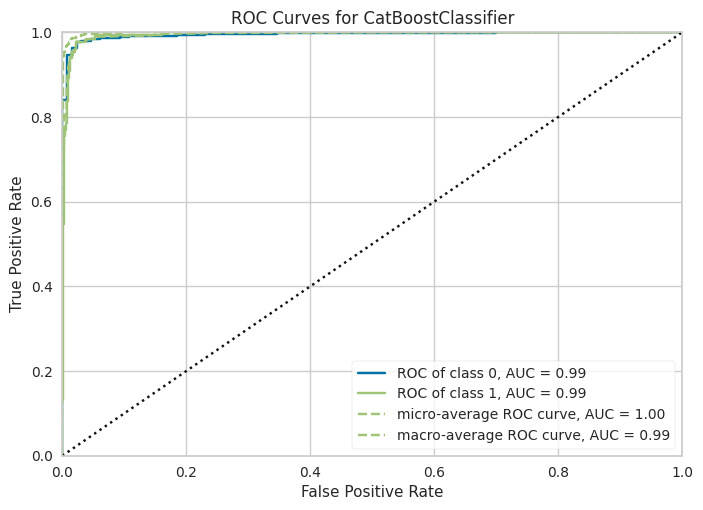

In [52]:
plot_model(tuned_catboost, plot = 'auc')

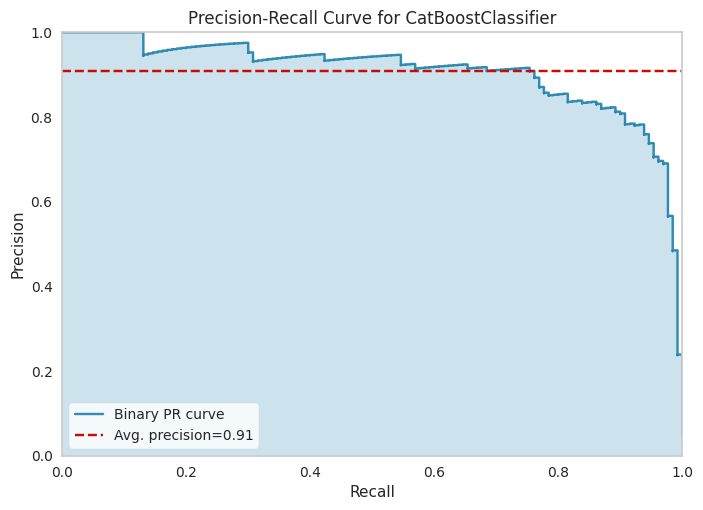

In [53]:
plot_model(tuned_catboost, plot = 'pr')

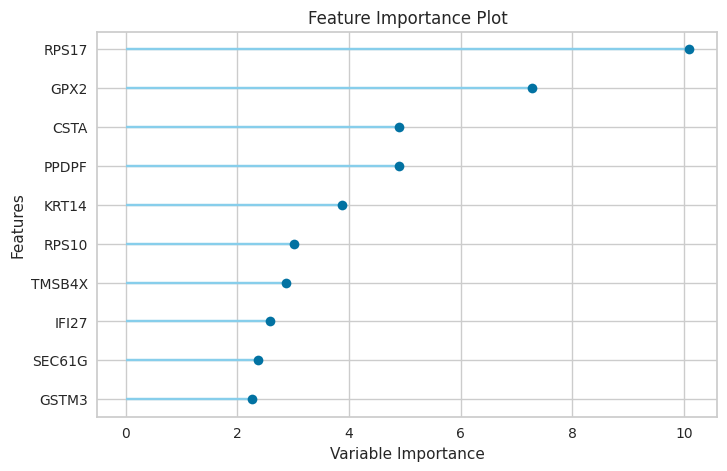

In [54]:
plot_model(tuned_catboost, plot='feature')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

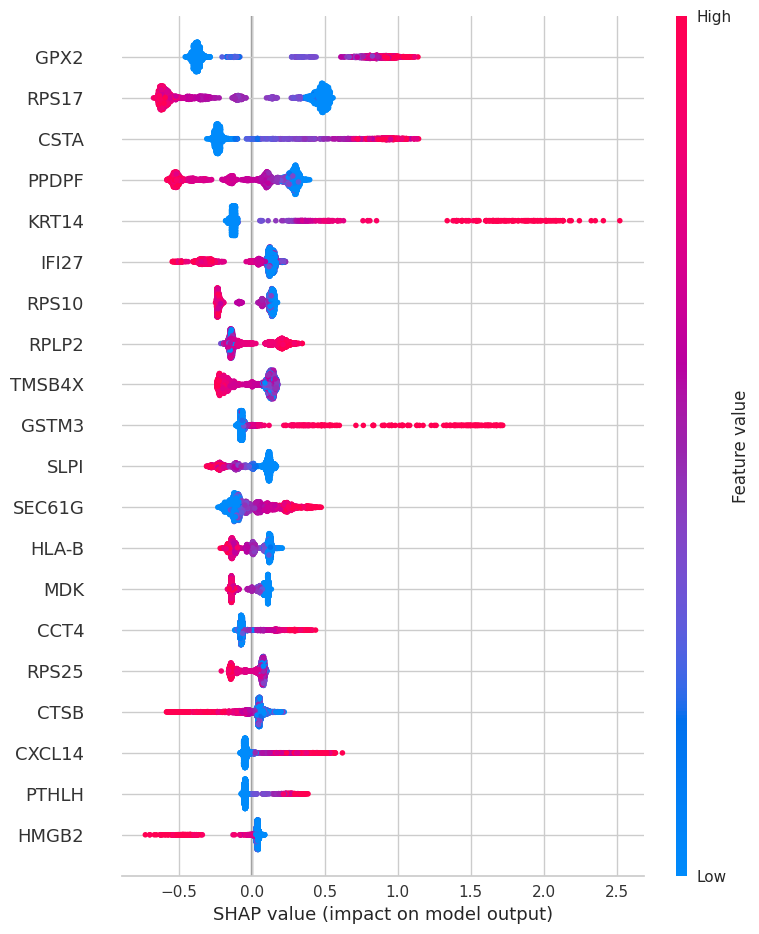

In [55]:
interpret_model(tuned_catboost)

In [ ]:
predict_model(tuned_catboost)

In [ ]:
final_catboost = finalize_model(tuned_catboost)

In [56]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9810,0.9938,0.9810,0.9800,0.9796,0.7595,0.7695
1,0.9841,0.9942,0.9841,0.9837,0.9830,0.7996,0.8101
2,0.9746,0.9779,0.9746,0.9728,0.9733,0.6906,0.6953
3,0.9841,0.9976,0.9841,0.9837,0.9830,0.7996,0.8101
4,0.9714,0.9837,0.9714,0.9686,0.9687,0.6257,0.6397
5,0.9857,0.9934,0.9857,0.9852,0.9854,0.8346,0.8359
6,0.9873,0.9943,0.9873,0.9870,0.9867,0.8506,0.8560
7,0.9841,0.9875,0.9841,0.9844,0.9827,0.7997,0.8163
8,0.9873,0.9871,0.9873,0.9869,0.9869,0.8554,0.8577


In [57]:
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9810,0.9922,0.9810,0.9810,0.9810,0.7900,0.7900
1,0.9857,0.9862,0.9857,0.9860,0.9858,0.8450,0.8451
2,0.9730,0.9810,0.9730,0.9754,0.9740,0.7243,0.7267
3,0.9889,0.9982,0.9889,0.9891,0.9890,0.8794,0.8795
4,0.9730,0.9822,0.9730,0.9735,0.9732,0.7071,0.7072
5,0.9841,0.9913,0.9841,0.9841,0.9841,0.8250,0.8250
6,0.9873,0.9978,0.9873,0.9878,0.9875,0.8683,0.8688
7,0.9921,0.9932,0.9921,0.9920,0.9920,0.9139,0.9140
8,0.9937,0.9917,0.9937,0.9937,0.9937,0.9321,0.9321


Fitting 10 folds for each of 10 candidates, totalling 100 fits


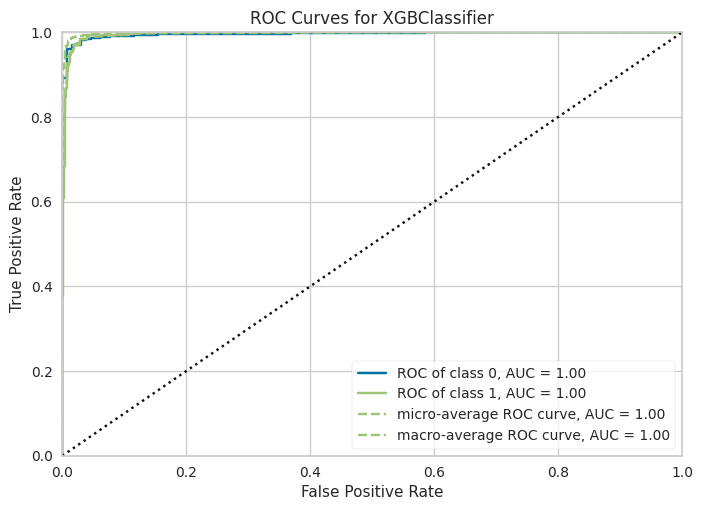

In [58]:
plot_model(tuned_xgboost, plot = 'auc')

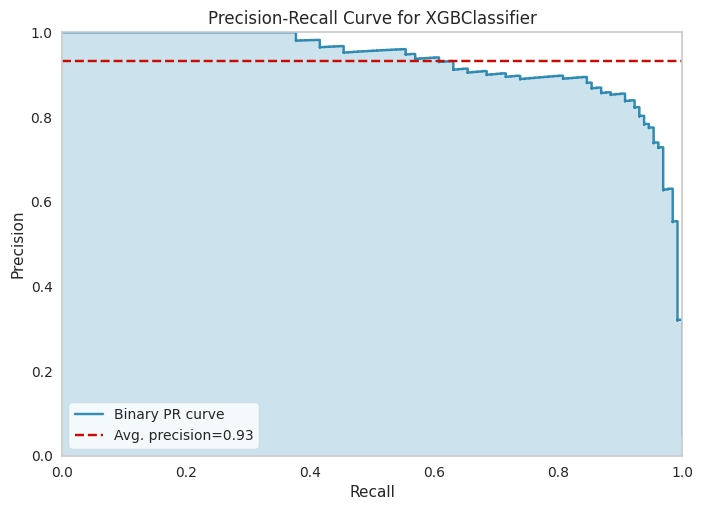

In [59]:
plot_model(tuned_xgboost, plot = 'pr')

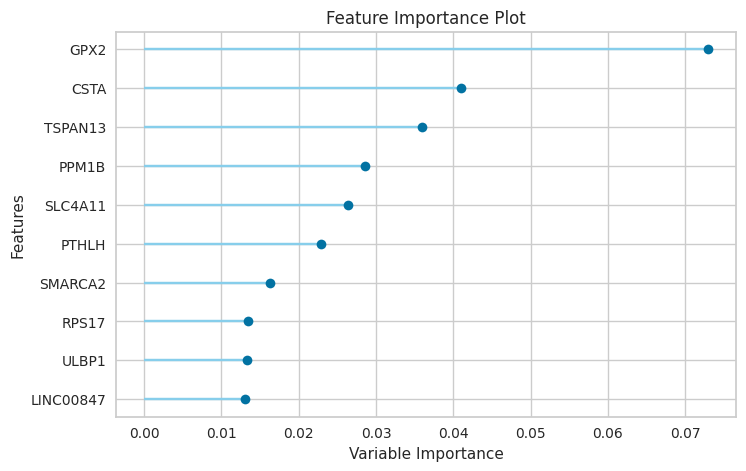

In [60]:
plot_model(tuned_xgboost, plot='feature')

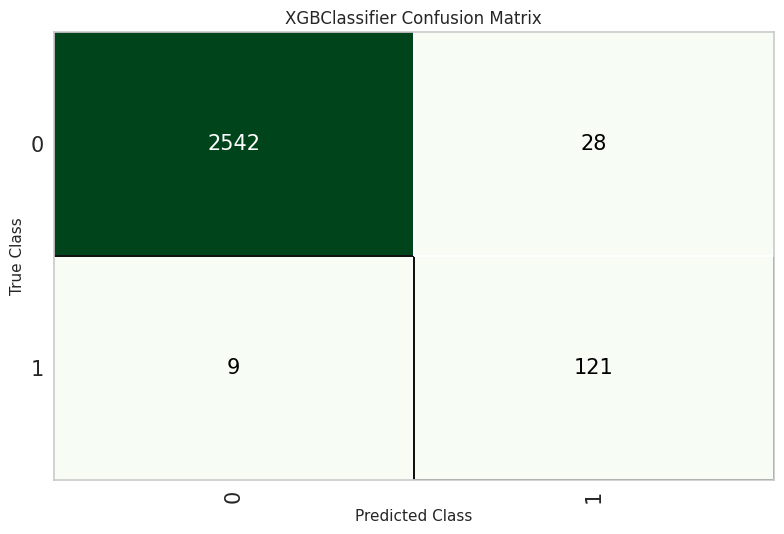

In [61]:
plot_model(tuned_xgboost, plot = 'confusion_matrix')

In [62]:
predict_model(tuned_xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9863,0.9960,0.9863,0.9876,0.9867,0.8602,0.8624


ValueError: y contains previously unseen labels: 0

In [ ]:
final_xgboost = finalize_model(tuned_xgboost)

In [ ]:
save_model(final_xgboost,'Final xgboost Model 231224')

In [ ]:
interpret_model(xgboost)